In [31]:
import numpy as np
import pandas as pd
from datetime import datetime,date

import missingno as msno

# import warnings
# warnings.filterwarnings("ignore")


### **A) Definições de Funções**

In [32]:
def ExtracaoAlvo(df,var_mes):
    Linha =  df.shape[0]
    
    aCols = np.arange(0,df.shape[1])
    df_alvo = pd.DataFrame(columns = aCols )
    
    for lin in range(Linha):   
        if ( (df.loc[lin,0] == -42.75) and (df.loc[lin,1] == -14.25)):
            variavel = df.values[lin,]
            df_alvo.loc[0] = variavel
    
    
    refdia = 1     
    Linha1    =  df_alvo.shape[0] 
    Colunas1  =  df_alvo.shape[1] 

   
    for lin2 in range(Linha1): 
        refhora = 0
    
        for col in range (Colunas1):        
            if col > 1:
               
                data = datetime(year=2017, month = var_mes, day = refdia, hour = refhora, minute=0, second=0)
                   
                lin_alvo = [df_alvo.loc[0,0], df_alvo.loc[0,1] , df_alvo.loc[0,col], data] 
                
                df_result_temp.loc[len(df_result_temp)] = lin_alvo  # adding a row
                
                refhora = refhora + 1
                
                if refhora == 24:                    
                    refdia = refdia + 1
                    refhora = 0
                    
    variavel = "ok"
    return variavel
    

### **B) Configuração de Dataframe Resultado**

In [33]:
frente = ['Longitude', 'Latitude', 'Temperatura', 'Data']  # Cabeçalho
df_result_temp = pd.DataFrame(columns=frente)  # Criação de um dataframe vazio


### **C) Coleta dos Dados de Pressão ECMWF**

In [34]:
mes = 1

for i in range(12):
    if i < 9:
        source_file = '../../../../PrevisaoVento/Data/raw/t2m/t2mNE_2017_0' + str(mes) + '.txt'
        # print(source_file)           
        df_temp = pd.read_csv(source_file, delimiter = r"\s+", header=None)
        
        a = ExtracaoAlvo(df_temp,mes)
        # print(a)
        
    else:
        source_file = '../../../../PrevisaoVento/Data/raw/t2m/t2mNE_2017_' + str(mes) + '.txt'
        # print(source_file)       
        df_temp = pd.read_csv(source_file, delimiter = r"\s+", header=None)  
        
        a = ExtracaoAlvo(df_temp,mes)
        # print(a)
    
    
    mes = mes + 1




### **D) Sobre os Dados**

#### <span style="color:#DC143C">**D1. Visao do Dataframe**

In [35]:
df_result_temp.head(2)  # visão de 5 linhas

,Longitude,Latitude,Temperatura,Data
0,-42.75,-14.25,25.93,2017-01-01 00:00:00
1,-42.75,-14.25,25.73,2017-01-01 01:00:00


#### <span style="color:#DC143C">**D2. Nome das Colunas do Cabeçalho**

In [36]:
# Lista o nome das Colunas
df_result_temp.columns 

Index(['Longitude', 'Latitude', 'Temperatura', 'Data'], dtype='object')

#### <span style="color:#DC143C">**D3. Conteúdo de 1 Linha**

In [37]:
df_result_temp.values[0:1]

array([[-42.75, -14.25, 25.93, Timestamp('2017-01-01 00:00:00')]],
      dtype=object)

#### <span style="color:#DC143C">**D4. Informações Sobre o Dataframe**

In [38]:
df_result_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Longitude    8760 non-null   float64       
 1   Latitude     8760 non-null   float64       
 2   Temperatura  8760 non-null   float64       
 3   Data         8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 342.2 KB


In [39]:
# Descreve apenas colunas "Numericas"
df_result_temp.describe(include=[np.number])

,Longitude,Latitude,Temperatura
count,8760.00,8760.00,8760.000000
mean,-42.75,-14.25,24.903272
std,0.00,0.00,4.454734
min,-42.75,-14.25,14.130000
25%,-42.75,-14.25,21.610000
50%,-42.75,-14.25,24.600000
75%,-42.75,-14.25,27.850000
max,-42.75,-14.25,36.270000


#### <span style="color:#DC143C">**D5. Formato dos Dados**

In [40]:
df_result_temp.shape # formato da matriz

(8760, 4)

### **E) Análise sobre os Dados**

#### <span style="color:#DC143C">**E1. Quantidade de valores não nulos**

In [41]:
df_result_temp.count()

Longitude      8760
Latitude       8760
Temperatura    8760
Data           8760
dtype: int64

#### <span style="color:#DC143C">**E2. Quantidade de valores NULOS**

<p>Exemplo:<br> 
<b>rain.isnull()</b>  # O conteúdo da campo onde está NULL recebe o valor FALSE, senão TRUE <br>
<b>rain.isnull().sum()</b>  # Totaliza os conteudos não NULL por coluna

In [42]:
df_result_temp.isnull().sum()

Longitude      0
Latitude       0
Temperatura    0
Data           0
dtype: int64

In [43]:
df_result_temp.isnull().sum().sort_values(ascending=False)[:100]

Longitude      0
Latitude       0
Temperatura    0
Data           0
dtype: int64

#### <span style="color:#DC143C"> **E3. Visualiação de Dados Faltantes**

<AxesSubplot:>

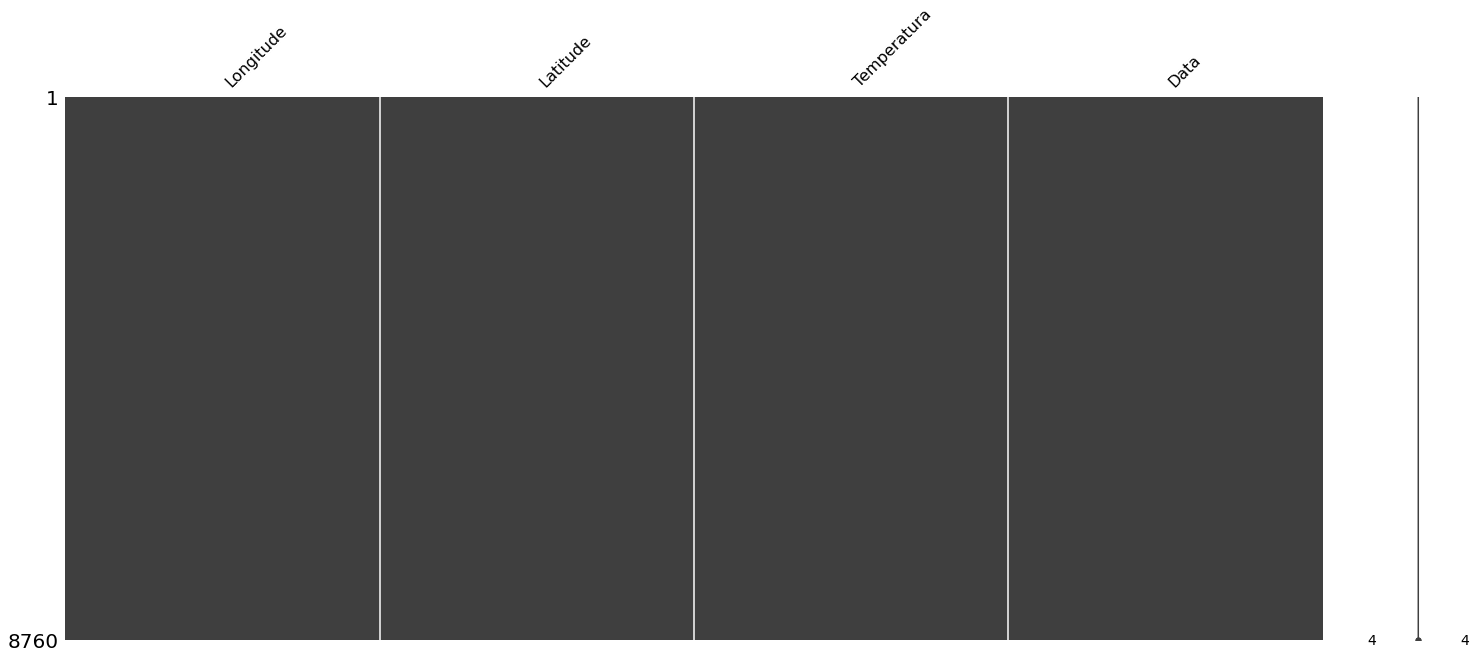

In [44]:
msno.matrix(df_result_temp)

### **F. Exporta Resultados**

In [45]:
output_file = '../../../../PrevisaoVento/Data/process/cenario1/temperatura_prevista.csv'
df_result_temp.to_csv(output_file, sep=';', encoding='utf-8')